## Import Packages & Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import netCDF4 as nc
import sympy

from pysr import PySRRegressor

In [2]:
data = nc.Dataset("kepler_gen/kepler.nc").variables
keys = data.keys()
values = data.values()

data_dict = {}
for k, v in zip(keys, values):
    data_dict[k] = np.array(v)
    
df = pd.DataFrame(data_dict)

In [3]:
df

,t,x,y,vx,vy,E,L,g
0,0.000000,3.245938,-2.397929,-0.518905,0.218893,-0.089206,-0.533784,0
1,0.010134,3.240677,-2.395709,-0.519406,0.219263,-0.089206,-0.533784,0
2,0.020268,3.235410,-2.393486,-0.519908,0.219635,-0.089206,-0.533784,0
3,0.030402,3.230139,-2.391258,-0.520412,0.220007,-0.089206,-0.533784,0
4,0.040535,3.224863,-2.389026,-0.520917,0.220381,-0.089206,-0.533784,0
...,...,...,...,...,...,...,...,...
100011,107.083036,0.528985,5.489560,0.427788,0.087795,-0.085969,-2.301924,9
100012,107.093748,0.533567,5.490499,0.427754,0.087444,-0.085969,-2.301924,9
100013,107.104459,0.538149,5.491433,0.427720,0.087094,-0.085969,-2.301924,9
100014,107.115171,0.542730,5.492364,0.427685,0.086744,-0.085969,-2.301924,9


In [4]:
grps = np.unique(df.g)
grps

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint64)

## Explore Data

### 1. Position

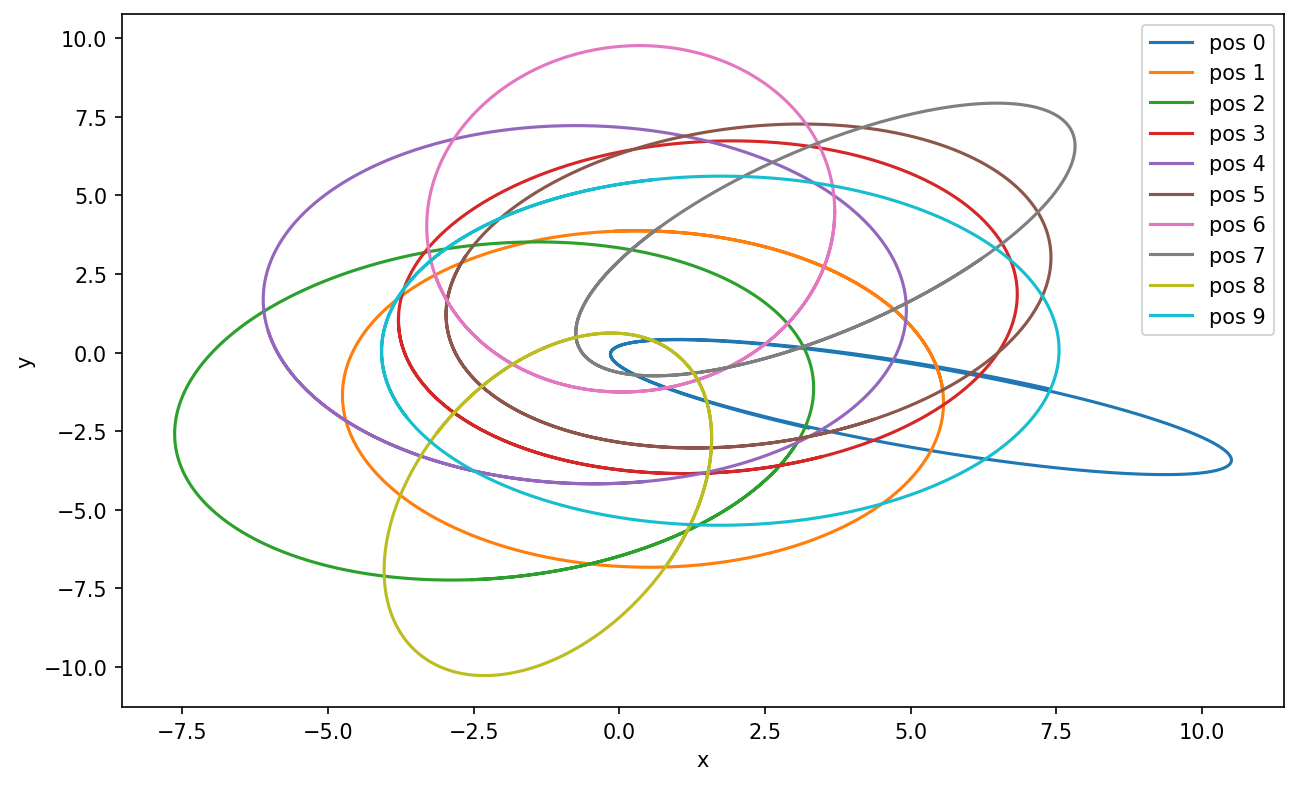

In [5]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.x[df.g == g], df.y[df.g == g], label=f'pos {g}')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### 2. Velocity

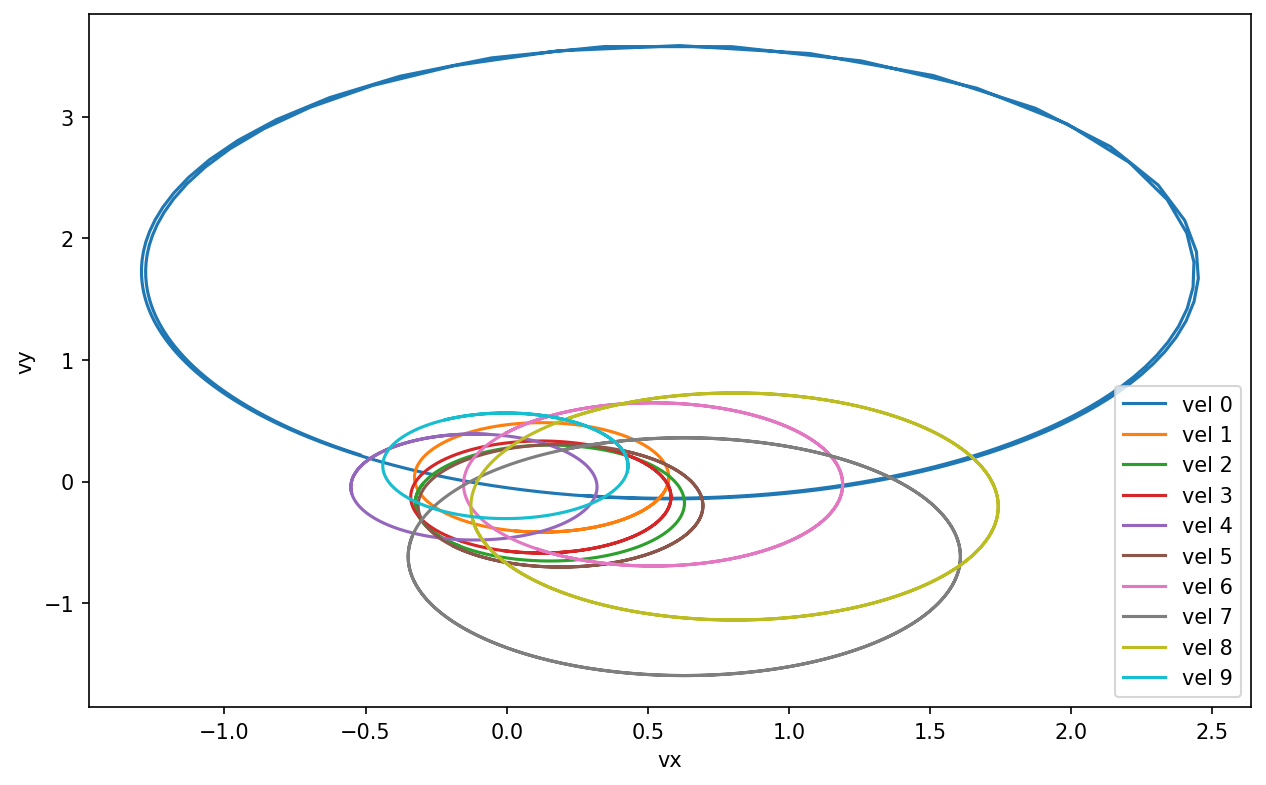

In [6]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.vx[df.g == g], df.vy[df.g == g], label=f'vel {g}')
plt.xlabel('vx')
plt.ylabel('vy')
plt.legend()
plt.show()

### 3. Position in time

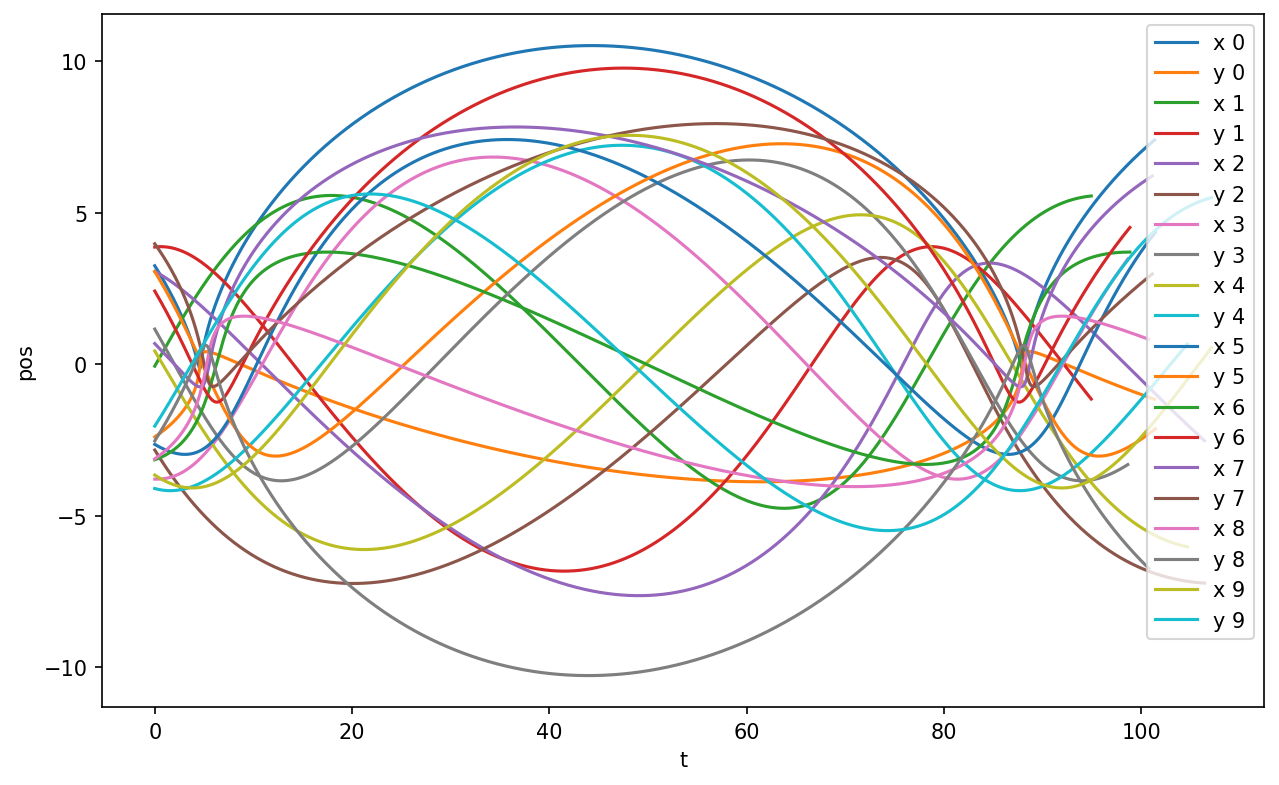

In [7]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.x[df.g == g], label=f'x {g}')
    plt.plot(df.t[df.g == g], df.y[df.g == g], label=f'y {g}')
plt.xlabel('t')
plt.ylabel('pos')
plt.legend()
plt.show()

### 4. Velocity in time

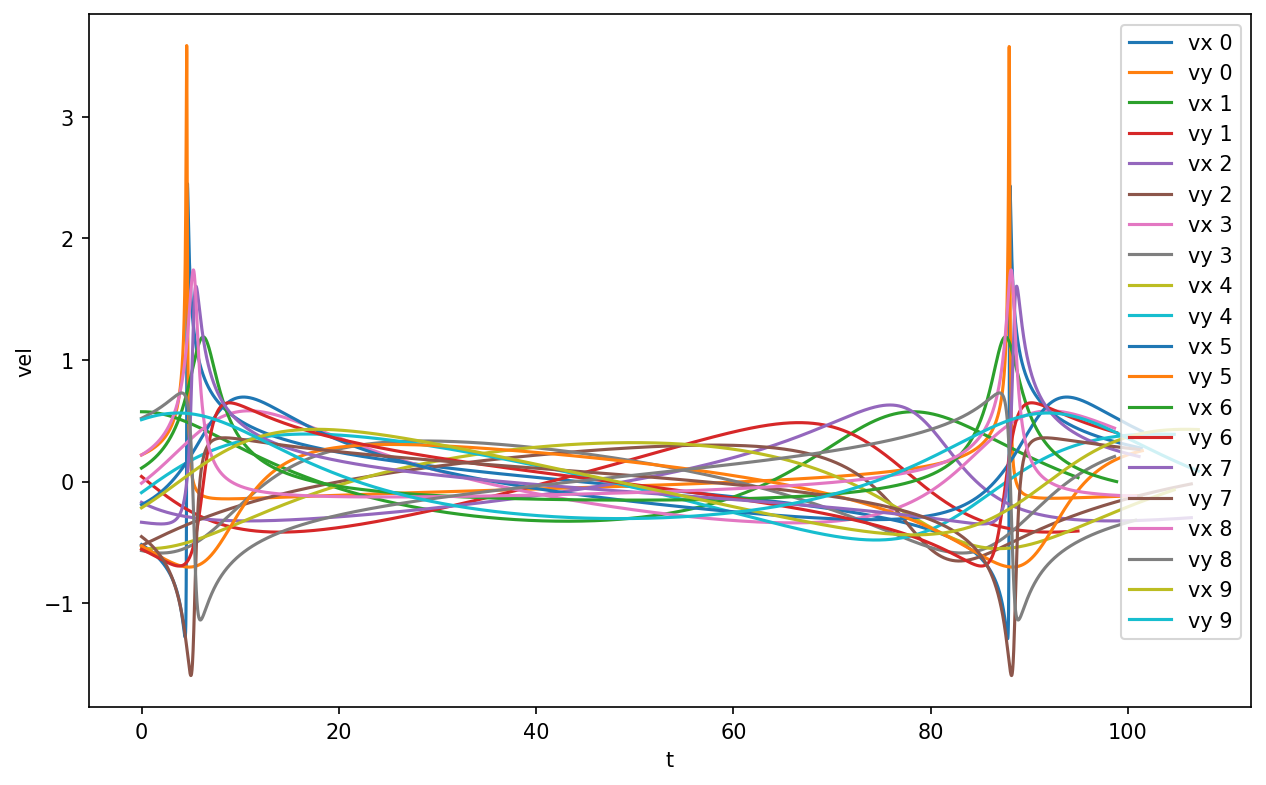

In [8]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.vx[df.g == g], label=f'vx {g}')
    plt.plot(df.t[df.g == g], df.vy[df.g == g], label=f'vy {g}')
plt.xlabel('t')
plt.ylabel('vel')
plt.legend()
plt.show()

### 5. Energy in time

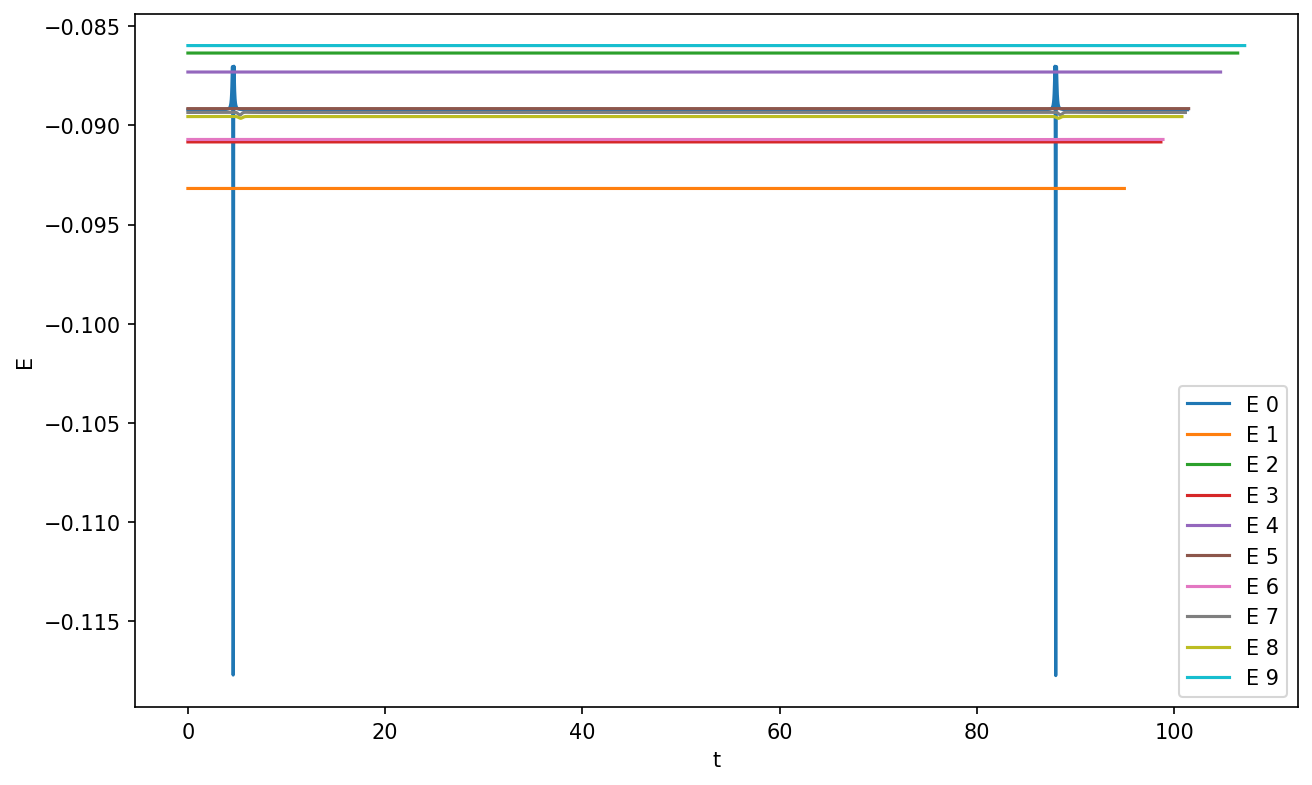

In [9]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.E[df.g == g], label=f'E {g}')
plt.xlabel('t')
plt.ylabel('E')
plt.legend()
plt.show()

### 6. Angular momentum in time

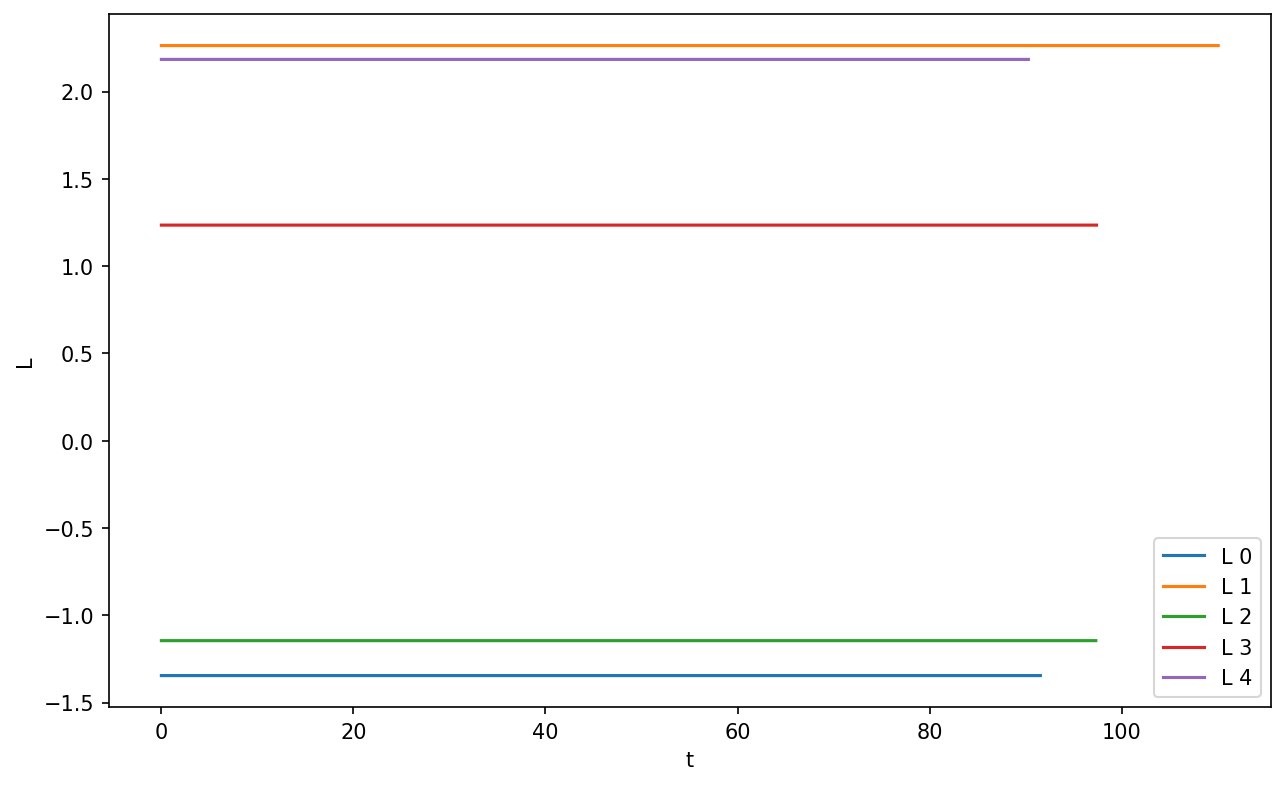

In [10]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.L[df.g == g], label=f'L {g}')
plt.xlabel('t')
plt.ylabel('L')
plt.legend()
plt.show()

## PySR for Angular Momentum

### Model Building & Data in matrix form

In [11]:
model = PySRRegressor(
    niterations=10,
    populations=100,
    binary_operators=["+", "-", "*"],
    maxdepth=10,
)

In [12]:
X = df.to_numpy()[:,1:-1]

In [13]:
L = X[:,-1]
X = X[:,:-2]

In [14]:
X.shape

(50008, 4)

### Model fitting

In [15]:
model.fit(X[::10,:], L[::10]);

/home/xteca/.local/lib/python3.10/site-packages/pysr/sr.py:1257: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!

Cycles per second: 6.520e+04
Head worker occupation: 1.9%
Progress: 180 / 1000 total iterations (18.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.501e+00  9.521e-08  0.6379041
3           1.317e+00  3.208e-01  (x0 * x3)
5           1.161e+00  6.317e-02  (0.32204083 - (x1 * x2))
7           1.073e-14  1.151e+01  ((x0 * x3) - (x2 * x1))
11          1.005e-14  1.635e-02  ((x0 * x3) - (((x2 * x1) - -0.14976001) + -0.14975998))

Press 'q' and then <enter> to stop execution early.

Cycles per second: 5.950e+04
Head worker occupation: 1.3%
Progress: 330 / 1000 total iterations (33.000%)
Hall of Fame:
-----------------------------------------
Complexity  Loss       Score     Equation
1           2.501e+00  9.521e-08  0.6379041
3           1.317e+00  3.208e-01  (x0 * x3)
5           1.161e+00  6.317e-02  (0.32204083 - (x1 * x2))
7           1.073e-14  1.151e+01  ((x0 * x3) - (x2 * x1))
11          1.005e-14  1.635

### Result

In [16]:
model.get_hof()

,complexity,loss,score,equation,sympy_format,lambda_format
0,1,2.501438e+00,0.000000,0.6379041,0.637904100000000,PySRFunction(X=>0.637904100000000)
1,3,1.316806e+00,0.320828,(x0 * x3),x0*x3,PySRFunction(X=>x0*x3)
2,5,1.160510e+00,0.063175,(0.32204083 - (x1 * x2)),-x1*x2 + 0.32204083,PySRFunction(X=>-x1*x2 + 0.32204083)
3,7,1.072705e-14,16.157434,((x0 * x3) - (x2 * x1)),x0*x3 - x1*x2,PySRFunction(X=>x0*x3 - x1*x2)
4,11,1.004791e-14,0.016351,((x0 * x3) - (((x2 * x1) - -0.14976001) + -0.1...,x0*x3 - x1*x2 - 3.00000000119649e-8,PySRFunction(X=>x0*x3 - x1*x2 - 3.000000001196...


In [17]:
best_model = model.get_best()

In [18]:
best_model.equation # = x * vy - y * vx

'((x0 * x3) - (x2 * x1))'

In [19]:
L_eval = best_model.lambda_format(X[::1000,:])

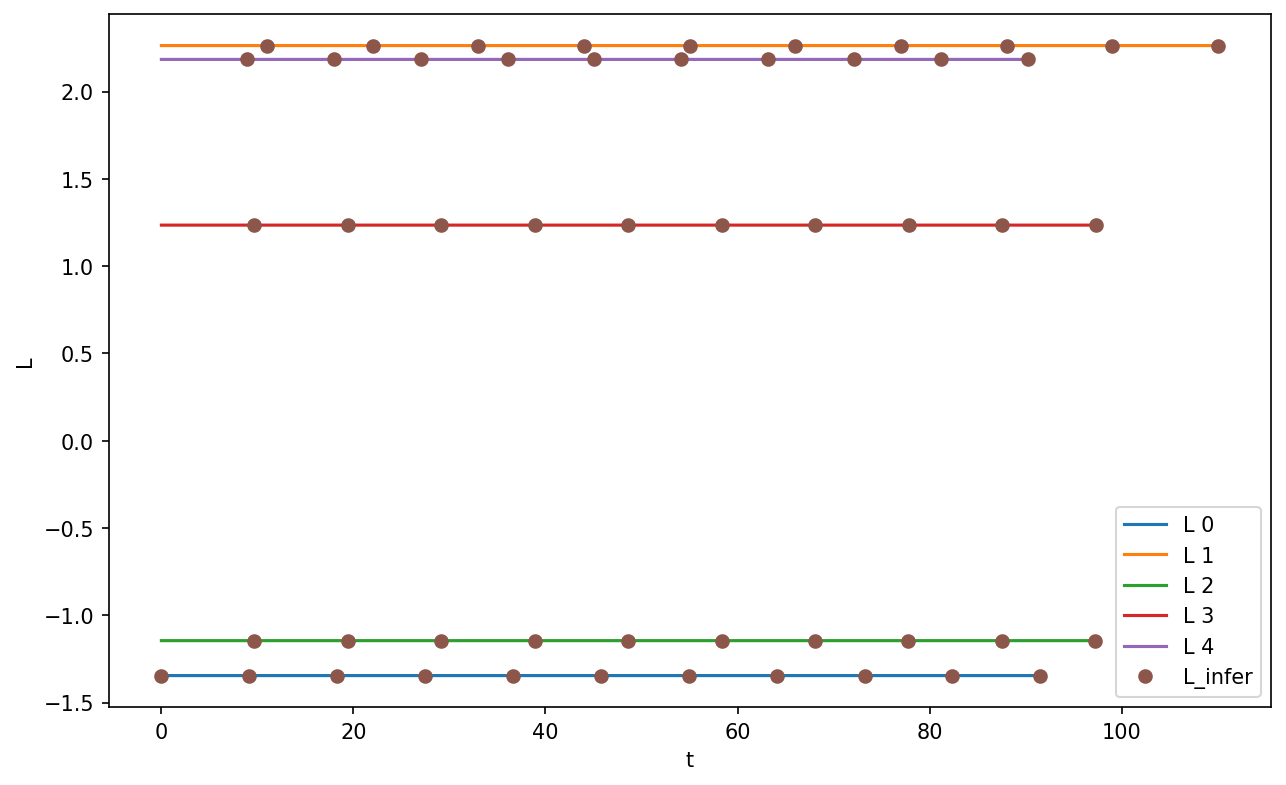

In [21]:
plt.figure(figsize=(10,6), dpi=150)
for g in grps:
    plt.plot(df.t[df.g == g], df.L[df.g == g], label=f"L {g}")
plt.plot(df.t[::1000], L_eval, 'o', label="L_infer")
plt.legend()
plt.xlabel('t')
plt.ylabel('L')
plt.savefig('L_infer.png', dpi=300, bbox_inches='tight')
plt.show()